<a href="https://colab.research.google.com/github/mukulsingh11/Deep-Learning-/blob/main/diabetes_prediction_dataset_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





In [115]:
# import datasets

df=pd.read_csv('/content/diabetes_prediction_dataset (1).csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0.0
2,Male,28.0,0,0,never,27.32,5.7,158,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0.0
4,Male,76.0,1,1,current,20.14,4.8,155,0.0
...,...,...,...,...,...,...,...,...,...
82560,Female,7.0,0,0,never,19.74,6.2,200,0.0
82561,Female,2.0,0,0,No Info,16.45,6.0,80,0.0
82562,Male,49.0,0,0,current,31.44,3.5,158,0.0
82563,Female,50.0,0,0,current,27.32,6.2,200,0.0


In [116]:
import tensorflow

In [117]:
# check the verion of tensorflow

print(tensorflow.__version__)

2.13.0


In [118]:
# check the top five row
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0.0
2,Male,28.0,0,0,never,27.32,5.7,158,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0.0
4,Male,76.0,1,1,current,20.14,4.8,155,0.0


In [119]:
# check the last five rows
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
82560,Female,7.0,0,0,never,19.74,6.2,200,0.0
82561,Female,2.0,0,0,No Info,16.45,6.0,80,0.0
82562,Male,49.0,0,0,current,31.44,3.5,158,0.0
82563,Female,50.0,0,0,current,27.32,6.2,200,0.0
82564,Female,49.0,0,0,No Info,37.60,4.0,155,NaN


In [120]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82565 entries, 0 to 82564
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               82565 non-null  object 
 1   age                  82565 non-null  float64
 2   hypertension         82565 non-null  int64  
 3   heart_disease        82565 non-null  int64  
 4   smoking_history      82565 non-null  object 
 5   bmi                  82565 non-null  float64
 6   HbA1c_level          82565 non-null  float64
 7   blood_glucose_level  82565 non-null  int64  
 8   diabetes             82564 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 5.7+ MB


In [121]:
# check the columns
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [122]:
# check the shape of datasets
df.shape

(82565, 9)

In [123]:
# check the missing value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               1
dtype: int64

In [124]:
# check the duplicated values
df.duplicated().sum()


2706

In [125]:
# drop the duplicated values
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0.0
2,Male,28.0,0,0,never,27.32,5.7,158,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0.0
4,Male,76.0,1,1,current,20.14,4.8,155,0.0
...,...,...,...,...,...,...,...,...,...
82559,Female,30.0,0,0,current,32.83,6.1,126,0.0
82560,Female,7.0,0,0,never,19.74,6.2,200,0.0
82561,Female,2.0,0,0,No Info,16.45,6.0,80,0.0
82562,Male,49.0,0,0,current,31.44,3.5,158,0.0


In [126]:
# check the unique values
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4127
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [127]:
# filling missing value with the help of fillna method
df['diabetes'] = df['diabetes'].fillna(0)



## Enoding the Categorical

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le


LabelEncoder()

In [129]:
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [130]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0.0
1,0,54.0,0,0,0,27.32,6.6,80,0.0
2,1,28.0,0,0,4,27.32,5.7,158,0.0
3,0,36.0,0,0,1,23.45,5.0,155,0.0
4,1,76.0,1,1,1,20.14,4.8,155,0.0


# Segregate the data

* Split dataframe X and Y

* X is independent data and y is dependent data (diabetes)

In [131]:
X = df.drop('diabetes', axis=1)
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
82560,0,7.0,0,0,4,19.74,6.2,200
82561,0,2.0,0,0,0,16.45,6.0,80
82562,1,49.0,0,0,1,31.44,3.5,158
82563,0,50.0,0,0,1,27.32,6.2,200


In [132]:
y = df['diabetes']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
82560    0.0
82561    0.0
82562    0.0
82563    0.0
82564    0.0
Name: diabetes, Length: 82565, dtype: float64

## Splitting the dataset into train and test set

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y , test_size=0.25 , random_state=33)

In [134]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(61923, 8)
(61923,)
(20642, 8)
(20642,)


## Model Building with the help of Deep Learning (ANN)

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc

StandardScaler()

In [136]:
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.84116784,  1.51505091, -0.28297958, ..., -0.55175161,
         0.63107919, -1.17856023],
       [ 1.18614061,  1.64842282, -0.28297958, ..., -0.69945017,
         0.44440617, -0.93301958],
       [ 1.18614061,  0.22578919, -0.28297958, ..., -1.24955195,
         0.16439664,  0.17191335],
       ...,
       [ 1.18614061,  0.04795998, -0.28297958, ..., -0.31362536,
         0.25773315,  0.51567026],
       [ 1.18614061, -1.59696015, -0.28297958, ..., -0.00466408,
         0.91108872, -1.42410088],
       [-0.84116784, -0.88564334, -0.28297958, ..., -0.203605  ,
        -0.95564148,  0.49111619]])

In [137]:
# importing the keras libraries and packages

import tensorflow.keras
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [138]:
# initializing the ANN model

classifier = Sequential()
classifier.add(Dense(units=10 , kernel_initializer='he_uniform',activation = 'relu',input_dim = 8))
classifier.add(Dense(units=10, kernel_initializer = 'he_uniform' , activation = 'relu'))
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform",activation='sigmoid'))

In [139]:
classifier.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [140]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                90        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [142]:
model_history = classifier.fit(X_train,  y_train , batch_size=10 , epochs=11, validation_split=0.25)


Epoch 1/11
4645/4645 [==============================] - 23s 5ms/step - loss: 0.2497 - accuracy: 0.9252 - val_loss: 0.2231 - val_accuracy: 0.9269
Epoch 2/11
4645/4645 [==============================] - 24s 5ms/step - loss: 0.2159 - accuracy: 0.9299 - val_loss: 0.1943 - val_accuracy: 0.9335
Epoch 3/11
4645/4645 [==============================] - 25s 5ms/step - loss: 0.1903 - accuracy: 0.9359 - val_loss: 0.1900 - val_accuracy: 0.9410
Epoch 4/11
4645/4645 [==============================] - 24s 5ms/step - loss: 0.1704 - accuracy: 0.9404 - val_loss: 0.1591 - val_accuracy: 0.9375
Epoch 5/11
4645/4645 [==============================] - 24s 5ms/step - loss: 0.1565 - accuracy: 0.9447 - val_loss: 0.1781 - val_accuracy: 0.9406
Epoch 6/11
4645/4645 [==============================] - 25s 5ms/step - loss: 0.1453 - accuracy: 0.9485 - val_loss: 0.2006 - val_accuracy: 0.9221
Epoch 7/11
4645/4645 [==============================] - 25s 5ms/step - loss: 0.1385 - accuracy: 0.9514 - val_loss: 0.1324 - val_ac

In [143]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [144]:
model_history.history['accuracy']

[0.9251754879951477,
 0.929869532585144,
 0.9359200596809387,
 0.9403557181358337,
 0.9446621537208557,
 0.9484733939170837,
 0.9514448046684265,
 0.9525214433670044,
 0.9525214433670044,
 0.9538348913192749,
 0.9543086290359497]

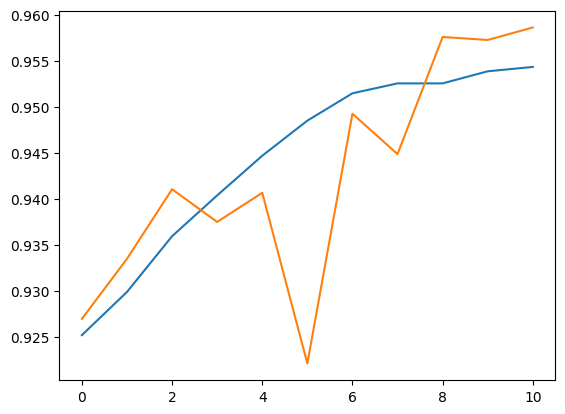

In [145]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])


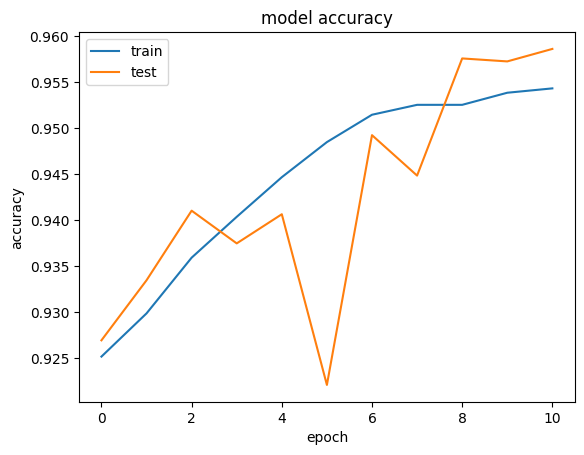

In [146]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

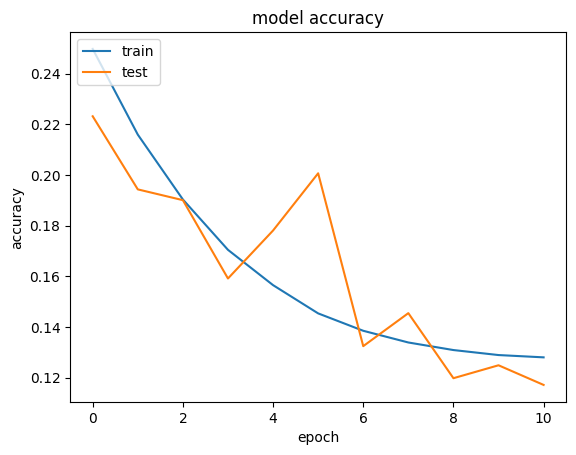

In [154]:
# summary history for  validation  loss accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [147]:
y_pred = classifier.predict(X_test)
y_pred

646/646 [==============================] - 2s 2ms/step


array([[2.9981155e-08],
       [8.3054607e-07],
       [1.3024805e-02],
       ...,
       [3.3979949e-02],
       [8.2937186e-04],
       [1.3302711e-03]], dtype=float32)

In [148]:
# for the sigmoid my threshold is 0.5
y_pred = y_pred>0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [149]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18726,    80],
       [  874,   962]])

## Hyperparameter tunning with keras tuner

In [150]:
pip install keras-tuner --upgrade

In [151]:
from kerastuner.tuners import RandomSearch


In [156]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units= 40,kernel_initializer = 'he_uniform',activation='relu',input_dim = 8))
  model.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics = ['accuracy'])
  return model

In [157]:
turner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='diabetes1',project_name='diabetes_prediction')

In [160]:
turner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=4)

Trial 4 Complete [00h 00m 42s]
val_accuracy: 0.9236508011817932

Best val_accuracy So Far: 0.9371669292449951
Total elapsed time: 00h 05m 38s


In [164]:
turner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [165]:
mymodel = turner.get_best_models(num_models=1)[0]

In [166]:
mymodel

In [167]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                360       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 2041 (7.97 KB)
Trainable params: 2041 (7.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
